In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

diretorio_atual = os.getcwd()
print(f"Logado no diretório: {diretorio_atual}")
sys.path.append('/home/jovyan/work')

Logado no diretório: /home/jovyan/work


In [2]:

import pandas as pd
import utils.Evaluation_pandas as eval_pd
import utils.EDA_pandas as eda_pd

import matplotlib.pyplot as plt
# Definindo os parâmetros globais
plt.rcParams.update({
    # 'font.family': 'serif',         # Fonte geral
    # 'font.serif': 'Times New Roman',# Estilo da fonte
    'font.size': 12,                # Tamanho da fonte
    'axes.labelsize': 12,           # Tamanho da fonte dos rótulos dos eixos
    'axes.titlesize': 12,           # Tamanho da fonte dos títulos dos subplots
    'xtick.labelsize': 10,          # Tamanho da fonte dos rótulos do eixo x
    'ytick.labelsize': 10,          # Tamanho da fonte dos rótulos do eixo y
    'legend.fontsize': 10,          # Tamanho da fonte da legenda
    'figure.titlesize': 10,         # Tamanho da fonte do título da figura
    # 'axes.spines.right': False,     # Remover a espinha do lado direito
    # 'axes.spines.top': False        # Remover a espinha do topo
    'savefig.dpi': 300,             # DPI para salvar a figura
    'savefig.format': 'png',        # Formato da figura ao salvar
    'savefig.bbox': 'tight',        # Remove espaços em branco extras
    'savefig.pad_inches': 0.1       # Espaçamento de preenchimento em polegadas
})

In [3]:
# Salvando a base de teste em formato CSV
train_data_experimento = pd.read_csv('./data/processed/train_data_experimento.csv')
test_data_experimento  = pd.read_csv('./data/processed/test_data_experimento.csv')

In [4]:
test_data_experimento.head(3)

PassengerId  Pclass                                               Name  \
0          710       3  Moubarek, Master. Halim Gonios ("William George")   
1          440       2             Kvillner, Mr. Johan Henrik Johannesson   
2          841       3                        Alhomaki, Mr. Ilmari Rudolf   

    Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0  male   NaN      1      1              2661  15.2458   NaN        C   
1  male  31.0      0      0        C.A. 18723  10.5000   NaN        S   
2  male  20.0      0      0  SOTON/O2 3101287   7.9250   NaN        S   

   Survived  y_predi_forest_clf  y_proba_forest_clf  y_predi_svm_clf  \
0         1                   0                0.34                0   
1         0                   0                0.03                0   
2         0                   0                0.04                0   

   y_proba_svm_clf  
0         0.165110  
1         0.137253  
2         0.150007

## KS 

### Teste Estatístico de Kolmogorov-Smirnov (KS)

In [5]:
import numpy as np
from scipy.stats import ks_2samp


amostra1 = train_data_experimento['y_proba_forest_clf']
amostra2 = test_data_experimento['y_proba_forest_clf']

# Calcular o teste KS
statistic, p_value = ks_2samp(amostra1, amostra2)

print(f"Estatística KS: {statistic}")
print(f"Valor p: {p_value}")

Estatística KS: 0.1429469825830718
Valor p: 0.0008243147607415938


**Interpretação:**

- **`Estatística KS:`** Este valor quantifica a diferença máxima entre as distribuições cumulativas das duas amostras. `Quanto maior esse valor, maior a diferença entre as distribuições.`

- **`Valor p:`** Este valor indica a significância estatística do resultado. `Um valor p pequeno` (geralmente menor que 0.05) indica que há evidências significativas para `rejeitar a hipótese nula de que as duas amostras vêm da mesma distribuição`.

## Métrica de Performance Kolmogorov-Smirnov (KS)

In [6]:
# Calculando a tabela KS e o valor KS
kstable, metric_ks = eval_pd.calculate_ks(df = test_data_experimento, target_col = 'Survived', prob_col = 'y_proba_forest_clf')
kstable

KS: 56.43, Decile 7
----


Range  events  nonevents  Total event_rate % nonevent_rate %  \
Decile                                                                     
1         [0-0.1]       8         75     83        7.21%          47.77%   
2       (0.1-0.2]       6         29     35        5.41%          18.47%   
3       (0.2-0.3]       9          9     18        8.11%           5.73%   
4       (0.3-0.4]       6          9     15        5.41%           5.73%   
5       (0.4-0.5]       5         12     17        4.50%           7.64%   
6       (0.5-0.6]       4          8     12        3.60%           5.10%   
7       (0.6-0.7]       4          6     10        3.60%           3.82%   
8       (0.7-0.8]       4          1      5        3.60%           0.64%   
9       (0.8-0.9]      12          3     15       10.81%           1.91%   
10      (0.9-1.0]      53          5     58       47.75%           3.18%   

       cum_event_rate % cum_nonevent_rate %     KS  
Decile                                              
1                 7.21%              47.77%  40.56  
2                12.61%              66.24%  53.63  
3                20.72%              71.97%  51.25  
4                26.13%              77.71%  51.58  
5                30.63%              85.35%  54.72  
6                34.23%              90.45%  56.21  
7                37.84%              94.27%  56.43  
8                41.44%              94.90%  53.46  
9                52.25%              96.82%  44.56  
10              100.00%             100.00%   0.00

KS: 56.43, Decile 7
----


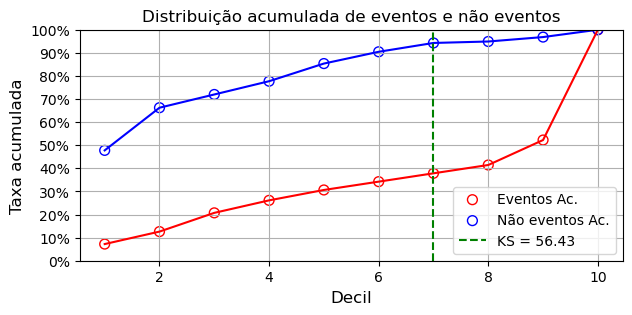

In [ ]:
# Exemplo de uso
eval_pd.plot_ks(df = test_data_experimento, target_col = 'Survived', prob_col = 'y_proba_forest_clf')

## Distribuições

### Distribuições Coluna

In [8]:
table = eval_pd.column_event_distribution(df = test_data_experimento,  target_col = 'Survived', prob_col = 'y_proba_forest_clf')
table

Range  events  nonevents  event_rate %  nonevent_rate %
1     [0-0.1]       8         75          7.21            47.77
2   (0.1-0.2]       6         29          5.41            18.47
3   (0.2-0.3]       9          9          8.11             5.73
4   (0.3-0.4]       6          9          5.41             5.73
5   (0.4-0.5]       5         12          4.50             7.64
6   (0.5-0.6]       4          8          3.60             5.10
7   (0.6-0.7]       4          6          3.60             3.82
8   (0.7-0.8]       4          1          3.60             0.64
9   (0.8-0.9]      12          3         10.81             1.91
10  (0.9-1.0]      53          5         47.75             3.18

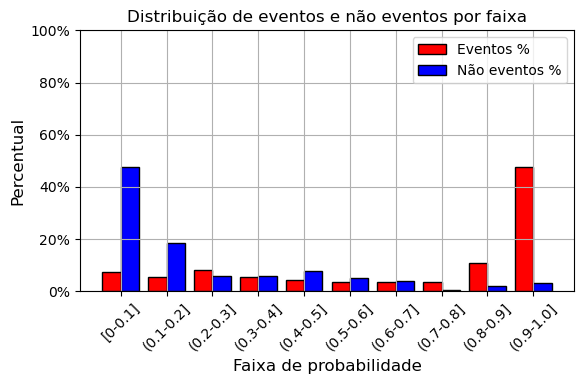

In [9]:
eval_pd.plot_event_distribution(df = test_data_experimento,  target_col = 'Survived', prob_col = 'y_proba_forest_clf')

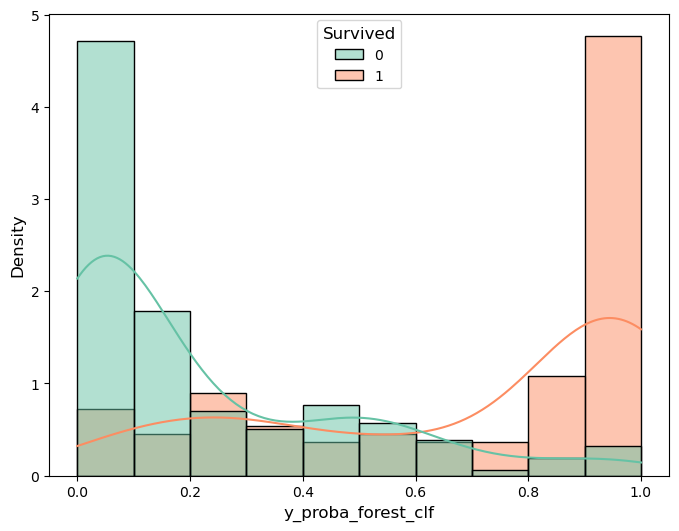

In [10]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(
    data = test_data_experimento, 
    x = 'y_proba_forest_clf',
    hue = 'Survived',
    kde = True,
    stat = 'density', common_norm = False,
    palette=['#66c2a5', '#fc8d62']
)
plt.show()

### Distribuições Linha

In [11]:
table_line = eval_pd.line_event_distribution(df = test_data_experimento,  target_col = 'Survived', prob_col = 'y_proba_forest_clf')
table_line

Range  events  nonevents  total_line  event_rate_line %  \
1     [0-0.1]       8         75          83               9.64   
2   (0.1-0.2]       6         29          35              17.14   
3   (0.2-0.3]       9          9          18              50.00   
4   (0.3-0.4]       6          9          15              40.00   
5   (0.4-0.5]       5         12          17              29.41   
6   (0.5-0.6]       4          8          12              33.33   
7   (0.6-0.7]       4          6          10              40.00   
8   (0.7-0.8]       4          1           5              80.00   
9   (0.8-0.9]      12          3          15              80.00   
10  (0.9-1.0]      53          5          58              91.38   

    nonevents_rate_line %  eventos/nonevents  
1                   90.36              10.67  
2                   82.86              20.69  
3                   50.00             100.00  
4                   60.00              66.67  
5                   70.59              41.67  
6                   66.67              50.00  
7                   60.00              66.67  
8                   20.00             400.00  
9                   20.00             400.00  
10                   8.62            1060.00

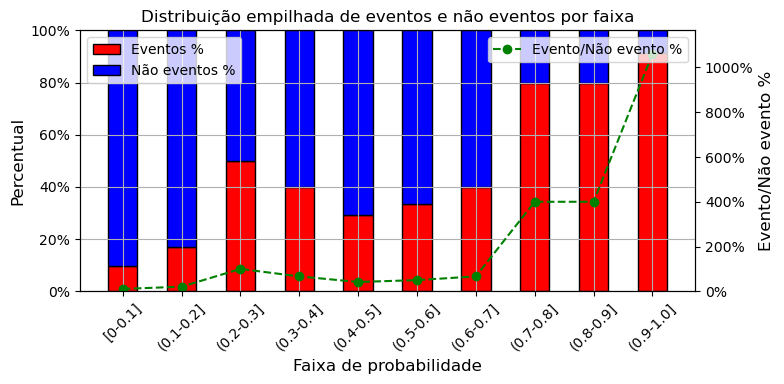

In [12]:
# Exemplo de uso
eval_pd.plot_stacked_bar(df=test_data_experimento, target_col='Survived', prob_col='y_proba_forest_clf')

## Population Stability Analysis

### Population Stability Index (PSI)

In [14]:
df_psi, psi_value = eval_pd.population_stability_index(
    reference_df = train_data_experimento, 
    monitored_df = test_data_experimento, reference_prob='y_proba_forest_clf', monitored_prob='y_proba_forest_clf')
df_psi


Range  Reference_Count  Reference_Perc  Monitored_Count  \
0    [0-0.1]              281        0.451043               83   
1  (0.1-0.2]               65        0.104334               35   
2  (0.2-0.3]               28        0.044944               18   
3  (0.3-0.4]               16        0.025682               15   
4  (0.4-0.5]               12        0.019262               17   
5  (0.5-0.6]                5        0.008026               12   
6  (0.6-0.7]               23        0.036918               10   
7  (0.7-0.8]               29        0.046549                5   
8  (0.8-0.9]               44        0.070626               15   
9  (0.9-1.0]              120        0.192616               58   

   Monitored_Perc       PSI  
0        0.309701  0.053138  
1        0.130597  0.005897  
2        0.067164  0.008927  
3        0.055970  0.023595  
4        0.063433  0.052646  
5        0.044776  0.063175  
6        0.037313  0.000004  
7        0.018657  0.025502  
8        0.055970  0.003409  
9        0.216418  0.002773

In [15]:
psi_value

0.23906523

### Characteristic Stability Index (CSI)

In [17]:
# Exemplo de como usar a função
csi_df = eval_pd.characteristic_stability_index(
    reference_df = train_data_experimento, 
    monitored_df = test_data_experimento, 
    feature_columns = ['PassengerId', 'Pclass', 'SibSp', 'Fare', 'Parch']
)
csi_df


Variable       CSI
0  PassengerId  0.026631
1       Pclass  0.016235
2        SibSp  0.002185
3         Fare  0.000459
4        Parch  0.001715

## Information Value

In [19]:
# Exemplo de como usar a função
iv, woe = eda_pd.iv_woe(data=train_data_experimento, target='Survived')
iv


Variable        IV               Predictiveness
0  y_predi_forest_clf  8.514693  Suspicious Predictive Power
0  y_proba_forest_clf  8.164148  Suspicious Predictive Power
0     y_proba_svm_clf  3.084373  Suspicious Predictive Power
0     y_predi_svm_clf  1.977656  Suspicious Predictive Power
0                 Sex  1.288443  Suspicious Predictive Power
0              Ticket  1.212696  Suspicious Predictive Power
0               Cabin  1.076458  Suspicious Predictive Power
0                Name  0.886835  Suspicious Predictive Power
0                Fare  0.514423  Suspicious Predictive Power
0              Pclass  0.434812      Strong predictive Power
0               Parch  0.156689      Medium predictive Power
0            Embarked  0.148629      Medium predictive Power
0               SibSp  0.143233      Medium predictive Power
0                 Age  0.134883      Medium predictive Power
0         PassengerId  0.124929      Medium predictive Power
0     Reference_Range  0.120684      Medium predictive Power